In [5]:
import os
import zipfile

In [6]:
!wget --no-check-certificate https://storage.googleapis.com/platzi-tf2/databasesLoadData.zip \
    -O /tmp/databasesLoadData.zip

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [7]:
local_zip = './tmp/databasesLoadData.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./tmp/databasesLoadData')
zip_ref.close()

In [8]:
import json 
import codecs
import requests
import numpy as np
from PIL import Image
from io import BytesIO
%matplotlib inline
import matplotlib.pyplot as plt

# Para cargar formatos json en formatos jpg u standards

In [9]:
pathjasonSign64 = './tmp/databasesLoadData/sign_mnist_json/data.json' # path to json file

In [10]:
dataJson = []
with codecs.open(pathjasonSign64, 'rU', 'utf-8') as js:
    for line in js:
        dataJson.append(json.loads(line))
print("{} imagenes encontradas.".format(len(dataJson)))
print(dataJson)

9 imagenes encontradas.
[{'content': 'https://storage.googleapis.com/platzi-tf2/img_mnist/29_B.jpg', 'label': 'b'}, {'content': 'https://storage.googleapis.com/platzi-tf2/img_mnist/30_B.jpg', 'label': 'b'}, {'content': 'https://storage.googleapis.com/platzi-tf2/img_mnist/95_B.jpg', 'label': 'b'}, {'content': 'https://storage.googleapis.com/platzi-tf2/img_mnist/58_A.jpg', 'label': 'a'}, {'content': 'https://storage.googleapis.com/platzi-tf2/img_mnist/50_A.jpg', 'label': 'a'}, {'content': 'https://storage.googleapis.com/platzi-tf2/img_mnist/46_A.jpg', 'label': 'a'}, {'content': 'https://storage.googleapis.com/platzi-tf2/img_mnist/3_C.jpg', 'label': 'c'}, {'content': 'https://storage.googleapis.com/platzi-tf2/img_mnist/32_C.jpg', 'label': 'c'}, {'content': 'https://storage.googleapis.com/platzi-tf2/img_mnist/2_C.jpg', 'label': 'c'}]


In [11]:
response2 = requests.get('https://lookaside.fbsbx.com/ig_messaging_cdn/?asset_id=493241602559847&signature=AbyJ2CFgqF-8sSnuLPgZsvLgFiEVOPZ_cmiggcdO8aBy9xXqgBO-IF8M4pbV0xagWoDtOe2-c96DNDG6WenbRgpRwhkV5HZtJpt4pSiEQKndva7TCyGCrwOysdI2YXG34C-JNNCSsIYZxQd7n7lhr350m4LfNrHdeaHcOC89bV3ZE1RxAtIWoAsfMeDOM7sr_m8ZJ_Jq3-jsU4SIinqAUK0f8Cetdw')
#save image in tmp folder
print(response2.content)
img = Image.open(BytesIO(response2.content))
img.save('./tmp/databasesLoadData/sign_mnist_json/image.png')

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x02\x1c\x03\xc0\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\

In [12]:
imagenes = []
for objectImage in dataJson:
    response = requests.get(objectImage['content'])
    img = np.asarray(Image.open(BytesIO(response.content)))
    imagenes.append([img, objectImage['label']])

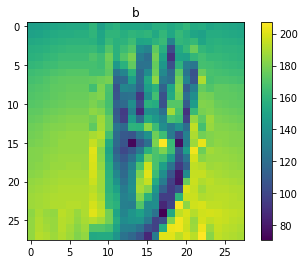

In [13]:
plt.imshow(imagenes[0][0].reshape(28, 28))
plt.title(imagenes[0][1])
plt.colorbar()
plt.show()

# Para cargar imagenes en formato 64 bits

In [14]:
import base64

In [15]:
url_imagenBase64 = './tmp/databasesLoadData/sign_mnist_base64/data.json'

In [16]:
with open(url_imagenBase64, 'r') as f:
    data = json.load(f)

In [17]:
print(data)

{'b': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/wAALCAAcABwBAREA/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/9oACAEBAAA/AOhS246VBdyJbqyDmbaGVSOuWxTUk3XckDKcGVkjI/2VBOf1qcwc9K00i4rnNbCLrcSPMkQKJ97PUNnHHtmrllEf7US3dSJIEklcEdd7DBHtjP5VrGLmrSpxWHewQnxNHNOBsAJOfYZpvh8zXup394xPkKBAg9SDk/lx+db5j5pCcICO+K47X7+cL5uRv2kZxXW6TaRWek20UIIBQOSepZhkk/iasMxDV//Z'}


In [18]:
base64_img_bytes = data['b'].encode('utf-8')
path_img = './tmp/databasesLoadData/sign_mnist_base64/decoded_image.png'
with open(path_img, 'wb') as f:
    f.write(base64.decodebytes(base64_img_bytes))

In [32]:
img = Image.open("./tmp/databasesLoadData/pixeles.png")
img.show()

In [19]:
img = Image.open(path_img)
img

# Convertir imagenes de formato cvs

In [20]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

In [21]:
train_url = './tmp/databasesLoadData/sign_mnist_train/sign_mnist_train.csv'
test_url = './tmp/databasesLoadData/sign_mnist_test/sign_mnist_test.csv'

In [22]:
train_file = pd.read_csv(train_url)
test_file = pd.read_csv(test_url)

In [23]:
train_file.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [24]:
train_file.shape

(27455, 785)

In [25]:
labels = train_file['label'].values  #Get  tag of image

In [26]:
train_file.drop(['label'], axis=1, inplace=True) # remoce 1 colum with the label laberl and save in the same dataframe

In [27]:
train_file.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [28]:
imagenes = train_file.values

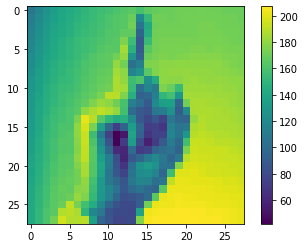

In [29]:
plt.imshow(imagenes[0].reshape(28, 28))
plt.colorbar()
plt.show()

# Preprocesamiento de datos

In [37]:
train_url_clean = './tmp/databasesLoadData/sign_mnist_train/sign_mnist_train_clean.csv'

In [38]:
train_csv = pd.read_csv(train_url_clean)

C:\Users\Daniel\AppData\Local\Temp\ipykernel_20608\2499965017.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,2

c:\Users\Daniel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

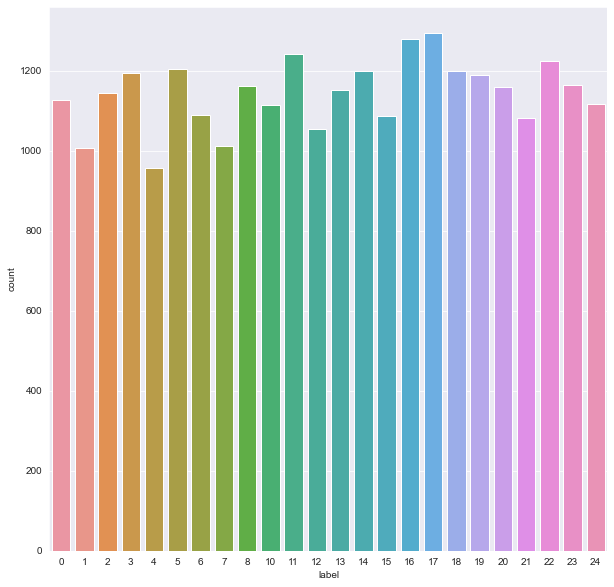

In [41]:
plt.figure(figsize=(10, 10))
sns.set_style('darkgrid')
sns.countplot(train_csv['label'])

In [42]:
train_csv.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [43]:
y_train = train_csv['label']
y_train = test_file['label']
del train_csv['label']
del test_file['label']

In [45]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 784 entries, pixel1 to pixel784
dtypes: object(784)
memory usage: 164.2+ MB


In [46]:
train_csv.dtypes

pixel1      object
pixel2      object
pixel3      object
pixel4      object
pixel5      object
             ...  
pixel780    object
pixel781    object
pixel782    object
pixel783    object
pixel784    object
Length: 784, dtype: object

In [47]:
unique_value = np.array(labels)
np.unique(unique_value)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [48]:
train_csv.isnull().values.any()

False

In [51]:
train_csv[train_csv.duplicated()]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784


In [50]:
train_csv = train_csv.drop([317, 487, 595,689, 802, 861],axis = 0)